In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
# Load dataset
from google.colab import drive
drive.mount('/content/drive')

file_path = "/content/drive/MyDrive/daily_spendings - lastversion.xlsx"
df = pd.read_excel(file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
print(df.columns.tolist())
df.dtypes


['Date', 'Total Screen Time of Phone(mins)', 'Time on Shopping Apps (mins)', 'Time on Social Media (mins)', 'Money Spent (TL)', 'Purchase Type', 'Time of Purchase', 'Ad Exposure Before Purchase (Yes/No)']


,0
Date,datetime64[ns]
Total Screen Time of Phone(mins),int64
Time on Shopping Apps (mins),int64
Time on Social Media (mins),int64
Money Spent (TL),float64
Purchase Type,object
Time of Purchase,object
Ad Exposure Before Purchase (Yes/No),object


In [4]:
# Preprocess columns
df['Date'] = pd.to_datetime(df['Date'])
df['Money Spent (TL)'] = df['Money Spent (TL)'].astype(float)
df['Ad Exposure Before Purchase (Yes/No)'] = df['Ad Exposure Before Purchase (Yes/No)'].map({'yes': 1, 'no': 0})


In [5]:
df.head()

,Date,Total Screen Time of Phone(mins),Time on Shopping Apps (mins),Time on Social Media (mins),Money Spent (TL),Purchase Type,Time of Purchase,Ad Exposure Before Purchase (Yes/No)
0,2025-03-31,167,16,142,455.80,Shopping,evening,1
1,2025-03-31,167,16,142,247.00,Food,afternoon,0
2,2025-03-01,315,32,232,2785.00,Shopping,evening,1
3,2025-03-03,191,28,167,193.90,Beverage,morning,0
4,2025-03-04,199,27,154,257.99,Shopping,night,1


In [6]:
 #example of data set
df.describe()

,Date,Total Screen Time of Phone(mins),Time on Shopping Apps (mins),Time on Social Media (mins),Money Spent (TL),Ad Exposure Before Purchase (Yes/No)
count,49,49.000000,49.000000,49.000000,49.000000,49.000000
mean,2025-04-09 23:30:36.734693888,242.571429,29.285714,149.897959,581.647347,0.448980
min,2025-03-01 00:00:00,121.000000,13.000000,56.000000,80.000000,0.000000
25%,2025-04-08 00:00:00,186.000000,22.000000,126.000000,167.000000,0.000000
50%,2025-04-13 00:00:00,245.000000,25.000000,144.000000,285.000000,0.000000
75%,2025-04-18 00:00:00,302.000000,34.000000,198.000000,538.990000,1.000000
max,2025-04-23 00:00:00,365.000000,76.000000,232.000000,2866.800000,1.000000
std,NaN,70.392945,14.339630,51.677786,700.975668,0.502545


<Axes: title={'center': 'Money Spent (TL)'}>

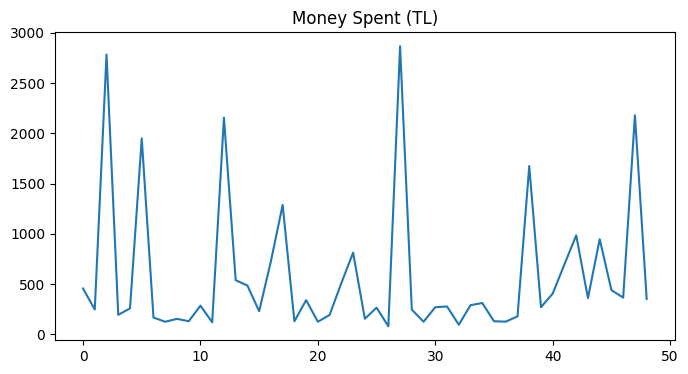

In [7]:
#  Money Spent (TL)

from matplotlib import pyplot as plt
df['Money Spent (TL)'].plot(kind='line', figsize=(8, 4), title='Money Spent (TL)') #y axis amount of money

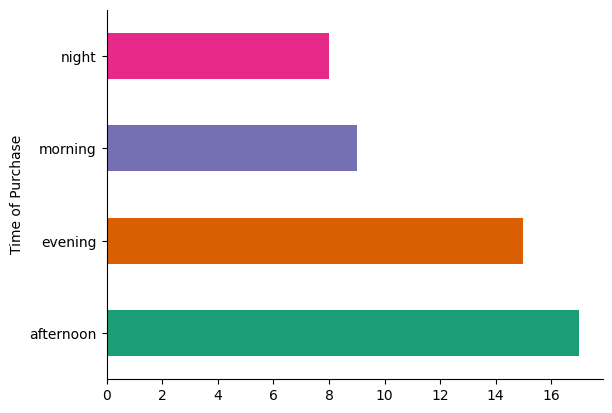

In [8]:
#Bar chart of different times of purchase

df.groupby('Time of Purchase').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

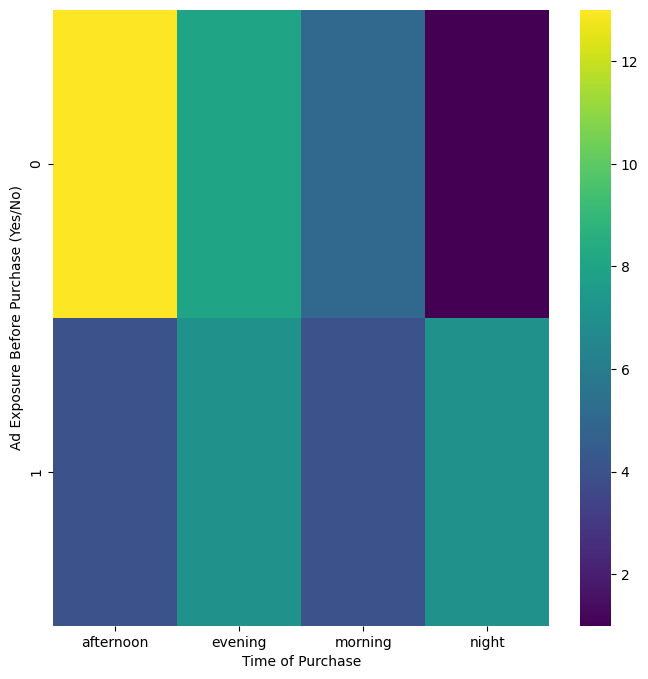

In [9]:
#Time of Purchase vs Ad Exposure Before Purchase (Yes/No)
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Ad Exposure Before Purchase (Yes/No)'].value_counts()
    for x_label, grp in df.groupby('Time of Purchase')})

sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Time of Purchase')
_ = plt.ylabel('Ad Exposure Before Purchase (Yes/No)')

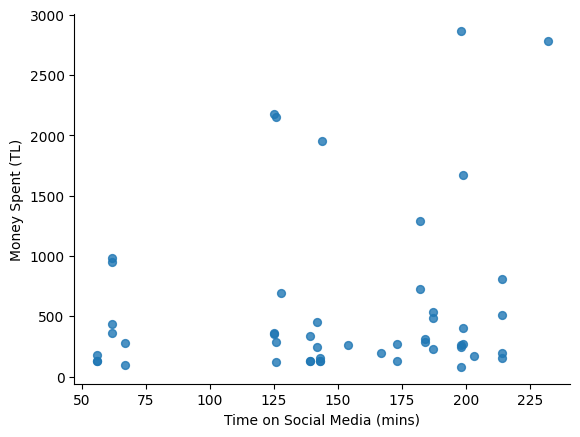

In [10]:
# Time on Social Media (mins) vs Money Spent (TL)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Time on Social Media (mins)', y='Money Spent (TL)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

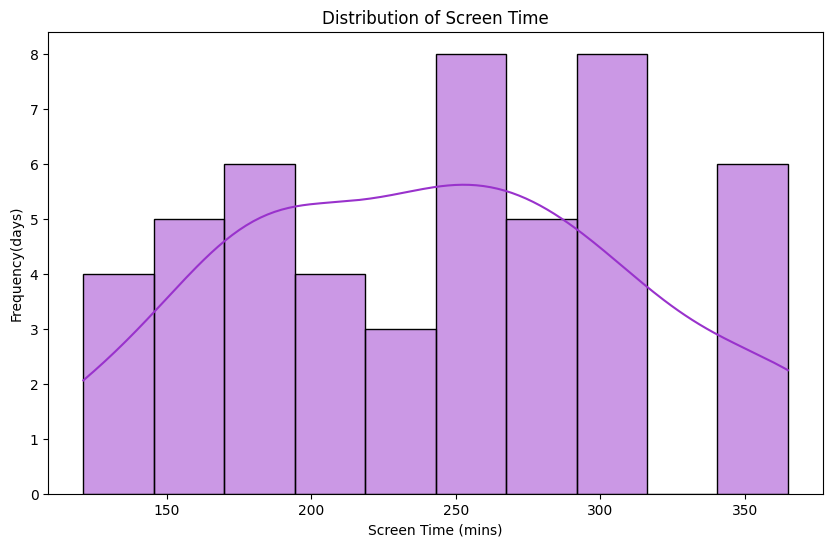

In [11]:

# Histogram: Screen Time
plt.figure(figsize=(10, 6))
sns.histplot(df['Total Screen Time of Phone(mins)'], kde=True, bins=10,color="darkorchid")
plt.title("Distribution of Screen Time")
plt.xlabel("Screen Time (mins)")
plt.ylabel("Frequency(days)")  #days
plt.show()

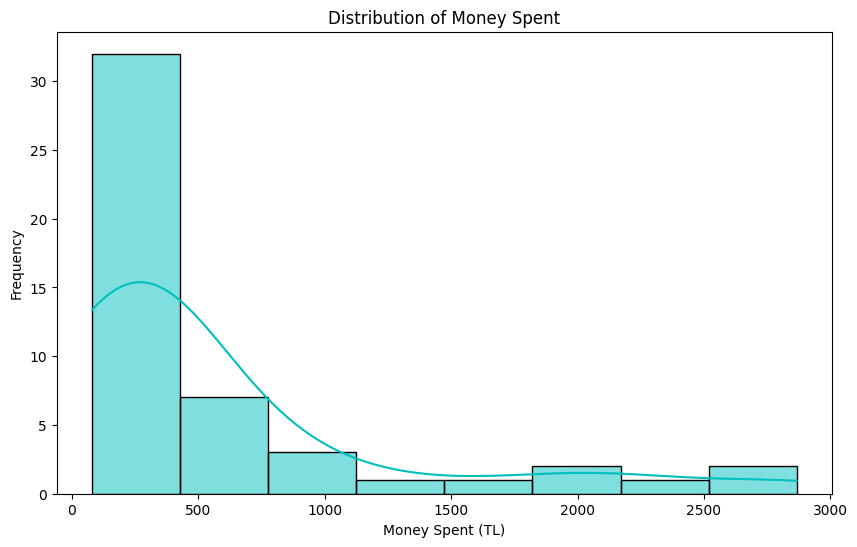

In [159]:
# Histogram: Money Spent
plt.figure(figsize=(10, 6))
sns.histplot(df['Money Spent (TL)'],kde=True, bins=8,color="c")
plt.title("Distribution of Money Spent")
plt.xlabel("Money Spent (TL)")
plt.ylabel("Frequency")
plt.show()

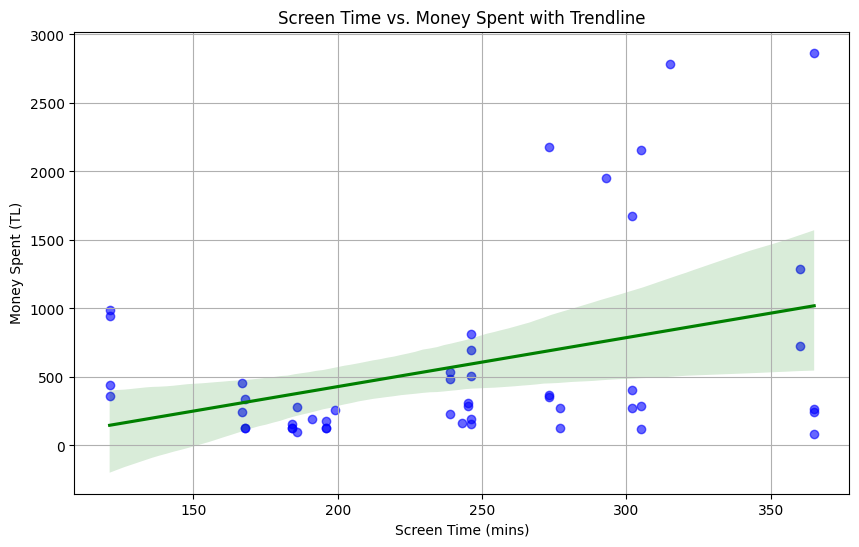

In [161]:
# Scatterplot: Screen Time vs Spending with trendline
plt.figure(figsize=(10, 6))
sns.regplot(x='Total Screen Time of Phone(mins)', y='Money Spent (TL)', data=df, color='blue', scatter_kws={'alpha':0.6}, line_kws={'color':'green'})
plt.title("Screen Time vs. Money Spent with Trendline")
plt.xlabel("Screen Time (mins)")
plt.ylabel("Money Spent (TL)")
plt.grid(True)
plt.show()

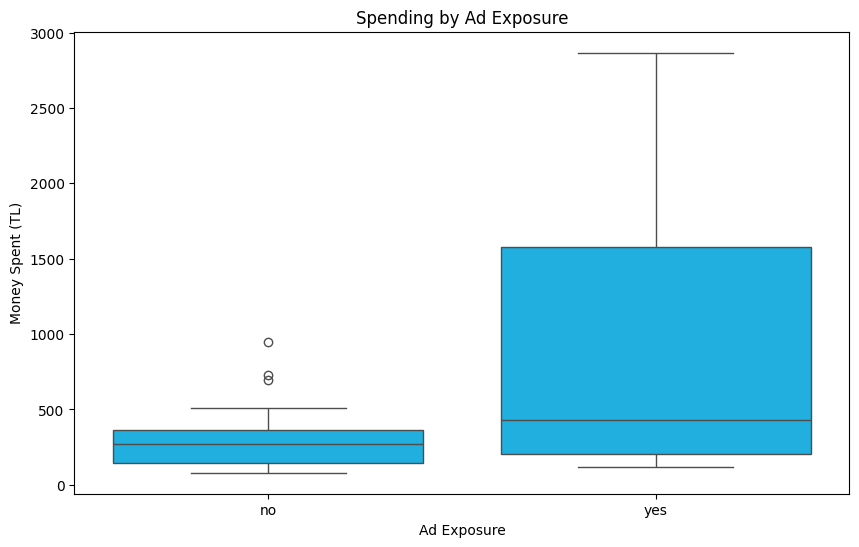

In [162]:
# Boxplot: Ad exposure vs Spending
plt.figure(figsize=(10, 6))
sns.boxplot(x='Ad Exposure Before Purchase (Yes/No)', y='Money Spent (TL)', data=df ,color='deepskyblue') # Changed x to the original column name
plt.title("Spending by Ad Exposure")
plt.xlabel("Ad Exposure")
plt.ylabel("Money Spent (TL)")
plt.xticks([0, 1], ['no', 'yes'])
plt.show()

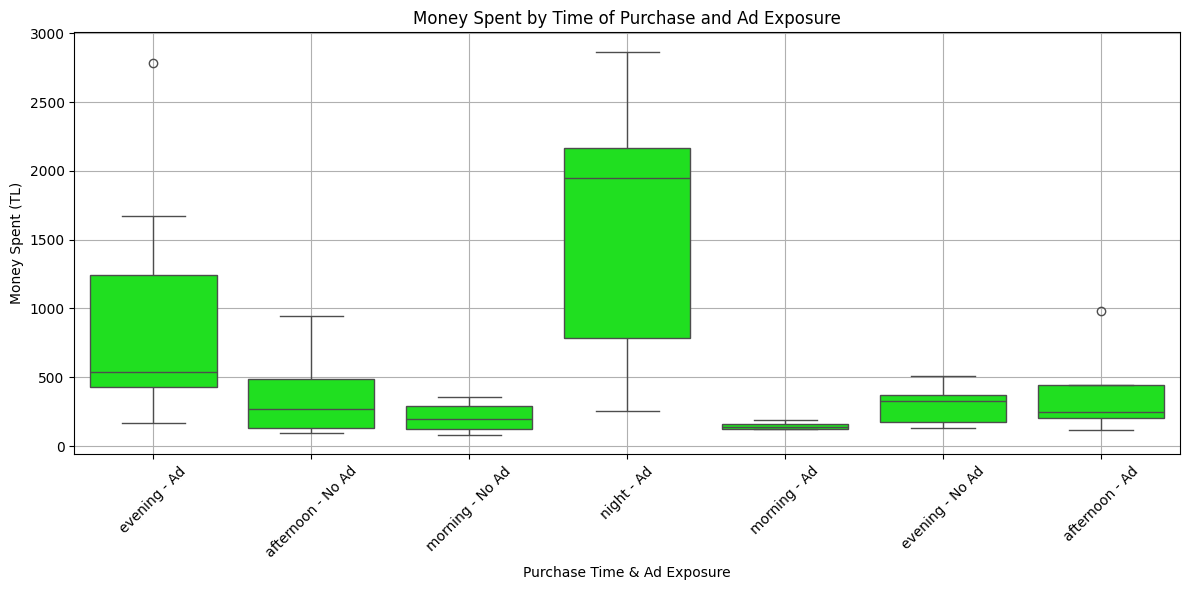

In [12]:
# Create dummy variables for Time of Purchase
time_of_purchase_dummies = pd.get_dummies(df['Time of Purchase'], prefix='Time of Purchase')

# Concatenate dummy variables with original DataFrame
df = pd.concat([df, time_of_purchase_dummies], axis=1)




df['Time of Purchase'] = df[['Time of Purchase_afternoon', 'Time of Purchase_evening', 'Time of Purchase_morning', 'Time of Purchase_night']].idxmax(axis=1)
df['Time of Purchase'] = df['Time of Purchase'].str.replace('Time of Purchase_', '') # Clean up the column name

df['Time of Purchase'] = df['Time of Purchase'].str.strip()
df['Ad Exposure Before Purchase (Yes/No)'] = df['Ad Exposure Before Purchase (Yes/No)'].map({1: 'Ad', 0: 'No Ad'})

# new column that combines both
df['Purchase Context'] = df['Time of Purchase'] + " - " + df['Ad Exposure Before Purchase (Yes/No)']


# value counts for each category in 'Purchase Context'
counts = df['Purchase Context'].value_counts()
# Filter out categories with less than a minimum number of data points (e.g., 2)
filtered_df = df[df['Purchase Context'].isin(counts[counts >= 2].index)]


# Plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Purchase Context', y='Money Spent (TL)', data=filtered_df,color='lime') # Fixed: pallette to palette
plt.title("Money Spent by Time of Purchase and Ad Exposure")
plt.xticks(rotation=45)
plt.ylabel("Money Spent (TL)")
plt.xlabel("Purchase Time & Ad Exposure")
plt.grid(True)
plt.tight_layout()
plt.show()


In [13]:
from scipy.stats import pearsonr

correlation_coefficient, p_value = pearsonr(df['Total Screen Time of Phone(mins)'], df['Money Spent (TL)'])
print(f"Pearson Correlation Coefficient: {correlation_coefficient:.2f}")
print(f"P-Value: {p_value:.4f}")
if p_value < 0.05:
    print("The p-value is less than 0.05. We reject the null hypothesis.")
else:
    print("The p-value is greater than or equal to 0.05. We fail to reject the null hypothesis.")

Pearson Correlation Coefficient: 0.36
P-Value: 0.0113
The p-value is less than 0.05. We reject the null hypothesis.
